In [10]:
import pandas as pd

In [18]:
# df = pd.read_csv("dataset/stitching/sweep_main_stitch_runs/sweep_results.csv")
df = pd.read_csv("results/X_sweep_test/sweep_results.csv")

In [19]:
df.head()

,dataset_path,dataset_slug,ds_method,seed,status,timed_out,return_code,duration_s,log_path,results_csv_source,results_csv_copy,figures_dir_copy,n_result_rows,prediction_rmse_mean,cosine_dissimilarity_mean,dtw_distance_mean,distance_to_attractor_mean
0,dataset/stitching/X,dataset__stitching__X,sp_recompute_all,1,ok,False,0,74.447220,results/X_sweep_test/logs/dataset__stitching__...,dataset/stitching/X/figures/sp_recompute_all/r...,results/X_sweep_test/results/dataset__stitchin...,results/X_sweep_test/figures/dataset__stitchin...,30,0.078792,0.088124,1923.204809,0.009959
1,dataset/stitching/X,dataset__stitching__X,sp_recompute_all,2,ok,False,0,71.727153,results/X_sweep_test/logs/dataset__stitching__...,dataset/stitching/X/figures/sp_recompute_all/r...,results/X_sweep_test/results/dataset__stitchin...,results/X_sweep_test/figures/dataset__stitchin...,30,0.076454,0.082263,2808.116325,0.009958
2,dataset/stitching/X,dataset__stitching__X,sp_recompute_ds,1,ok,False,0,60.173678,results/X_sweep_test/logs/dataset__stitching__...,dataset/stitching/X/figures/sp_recompute_ds/re...,results/X_sweep_test/results/dataset__stitchin...,results/X_sweep_test/figures/dataset__stitchin...,30,0.080487,0.104537,2731.683609,0.266598
3,dataset/stitching/X,dataset__stitching__X,sp_recompute_ds,2,ok,False,0,56.593616,results/X_sweep_test/logs/dataset__stitching__...,dataset/stitching/X/figures/sp_recompute_ds/re...,results/X_sweep_test/results/dataset__stitchin...,results/X_sweep_test/figures/dataset__stitchin...,30,0.079808,0.098918,1785.210944,0.009954
4,dataset/stitching/X,dataset__stitching__X,chain,1,ok,False,0,55.507657,results/X_sweep_test/logs/dataset__stitching__...,dataset/stitching/X/figures/chain/results_1.csv,results/X_sweep_test/results/dataset__stitchin...,results/X_sweep_test/figures/dataset__stitchin...,30,0.092390,0.151333,1276.329676,0.009985


In [20]:
df[df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "ds_method", "seed", "duration_s"]].groupby("ds_method").mean().reset_index()

,ds_method,prediction_rmse_mean,cosine_dissimilarity_mean,dtw_distance_mean,seed,duration_s
0,chain,0.095360,0.165017,1365.223377,1.5,58.529216
1,sp_recompute_all,0.077623,0.085193,2365.660567,1.5,73.087187
2,sp_recompute_ds,0.080148,0.101728,2258.447277,1.5,58.383647


In [ ]:
df[df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "ds_method", "seed", "duration_s"]].groupby("ds_method").mean().reset_index()

,ds_method,prediction_rmse_mean,cosine_dissimilarity_mean,dtw_distance_mean,seed,duration_s
0,chain,0.094090,0.176643,1390.871731,1.5,60.882583
1,sp_recompute_all,0.079708,0.093384,2597.561521,1.5,55.856912
2,sp_recompute_ds,0.080336,0.102246,2185.788919,1.5,62.690241


# Ablations

In [45]:
chain_method_df = pd.read_csv("results/sweep_chain_trigger/sweep_results.csv")
table = chain_method_df[chain_method_df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "chain_transition_trigger_method", "chain_ds_method", "duration_s"]].groupby(["chain_transition_trigger_method", "chain_ds_method"]).mean().reset_index()
print(table.to_markdown(index=False))

| chain_transition_trigger_method   | chain_ds_method   |   prediction_rmse_mean |   cosine_dissimilarity_mean |   dtw_distance_mean |   duration_s |
|:----------------------------------|:------------------|-----------------------:|----------------------------:|--------------------:|-------------:|
| distance_ratio                    | linear            |               0.100918 |                    0.195811 |             2333.61 |      76.808  |
| distance_ratio                    | segmented         |               0.28416  |                    0.21321  |             1075.5  |      91.6978 |
| mean_normals                      | linear            |               0.094193 |                    0.166881 |             2350.73 |      68.7855 |
| mean_normals                      | segmented         |               0.347127 |                    0.19126  |              878.53 |     120.959  |


In [47]:
chain_blend_df = pd.read_csv("results/sweep_chain_blend/sweep_results.csv")
chain_blend_df[chain_blend_df.dataset_slug == "dataset__stitching__X"][["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "chain_blend_length_ratio", "seed", "duration_s"]].groupby(["chain_blend_length_ratio"]).mean().reset_index()

,chain_blend_length_ratio,prediction_rmse_mean,cosine_dissimilarity_mean,dtw_distance_mean,seed,duration_s
0,0.00,0.222633,0.175862,746.218384,1.5,133.222815
1,0.25,0.286064,0.201940,1245.200437,1.5,149.195576
2,0.50,0.423346,0.263018,1910.013124,1.5,110.279131
3,0.75,0.224953,0.166423,882.448481,1.5,79.353099
4,1.00,0.173189,0.165837,704.943119,1.5,127.682620


In [ ]:
import matplotlib.pyplot as plt

blend_data = chain_blend_df[chain_blend_df.dataset_slug == "dataset__stitching__X"][
    ["prediction_rmse_mean", "cosine_dissimilarity_mean", "dtw_distance_mean", "chain_blend_length_ratio", "duration_s"]
]

metrics = [
    ("prediction_rmse_mean", "Prediction RMSE (↓)"),
    ("cosine_dissimilarity_mean", "Cosine Dissimilarity (↓)"),
    ("dtw_distance_mean", "DTW Distance (↓)"),
]

fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 5))
for ax, (col, title) in zip(axes, metrics):
    blend_data.boxplot(column=col, by="chain_blend_length_ratio", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Blend Length Ratio")
    ax.set_ylabel(col)

fig.suptitle("Chain Blend Length Ratio Ablation (X dataset)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# Early results

In [101]:
import pandas as pd 

seeds = [42, 100, 3215, 21]

dfs = []
for seed in seeds:
    df1 = pd.read_csv(f"./dataset/stitching/testing/figures/reuse/results_{seed}.csv")
    df2 = pd.read_csv(f"./dataset/stitching/testing/figures/recompute_all/results_{seed}.csv")
    df3 = pd.read_csv(f"./dataset/stitching/testing/figures/recompute_ds/results_{seed}.csv")
    df4 = pd.read_csv(f"./dataset/stitching/testing/figures/all_paths_all/results_{seed}.csv")
    df5 = pd.read_csv(f"./dataset/stitching/testing/figures/all_paths_ds/results_{seed}.csv")
    df6 = pd.read_csv(f"./dataset/stitching/testing/figures/all_paths_reuse/results_{seed}.csv")
    
    dfs.append(df1)
    dfs.append(df2)
    dfs.append(df3)
    dfs.append(df4)
    dfs.append(df5)
    dfs.append(df6)

df = pd.concat(dfs)
df['ds_method'] = df['ds_method'].replace({
    'reuse': 'Reuse Gauss + P',
    'recompute_all': 'Recompute All', 
    'recompute_ds': 'Reuse Gauss',
    'all_paths_all': 'Recompute All*',
    'all_paths_ds': 'Reuse Gauss*',
    'all_paths_reuse': 'Reuse Gauss + P*'
})

df['ds_method'] = pd.Categorical(df['ds_method'], 
                                categories=['Recompute All', 'Reuse Gauss', 'Reuse Gauss + P', 'Recompute All*', 'Reuse Gauss*', 'Reuse Gauss + P*'], 
                                ordered=True)

In [102]:
df.head()


,combination_id,ds_method,gg compute time,ds compute time,total compute time,initial_x,initial_y,attractor_x,attractor_y,prediction_rmse,cosine_dissimilarity,dtw_distance_mean,dtw_distance_std,distance_to_attractor_mean,distance_to_attractor_std,trajectory_length_mean,trajectory_length_std,n_simulations
0,0,Reuse Gauss + P,0.013085,1.769164,1.782253,8.836694,7.780032,4.258065,12.938312,0.085047,0.086853,7670.972933,43.489601,0.009996,3.580685e-07,15099.5,16.5,2
1,1,Reuse Gauss + P,0.012974,2.043422,2.056399,8.836694,7.780032,2.199597,2.587256,0.156074,0.124241,6665.440921,15.212105,0.009999,3.669937e-07,17597.5,165.5,2
2,2,Reuse Gauss + P,0.009230,0.000762,0.009994,8.836694,7.780032,11.469758,2.091112,0.317490,0.191363,567.329187,0.870292,0.009996,2.088425e-06,3422.0,28.0,2
3,3,Reuse Gauss + P,0.009293,0.025297,0.034591,8.836694,7.780032,4.051075,5.888799,0.065253,0.004747,25601.588754,451.030173,0.212356,3.767628e-02,30002.0,0.0,2
4,4,Reuse Gauss + P,0.009244,5.285944,5.295190,8.836694,7.780032,12.917339,12.440138,0.063316,0.108697,982.914591,2.881759,0.009997,1.520540e-06,10655.0,66.0,2


In [103]:
nan_counts = df.groupby('ds_method')['prediction_rmse'].apply(lambda x: x.isna().sum())
print(nan_counts / len(df[df["ds_method"]=="Recompute All"]))

ds_method
Recompute All       0.083333
Reuse Gauss         0.000000
Reuse Gauss + P     0.000000
Recompute All*      0.083333
Reuse Gauss*        0.000000
Reuse Gauss + P*    0.000000
Name: prediction_rmse, dtype: float64


In [105]:
nan_counts, len(df[df["ds_method"]=="Recompute All"])

(ds_method
 Recompute All       10
 Reuse Gauss          0
 Reuse Gauss + P      0
 Recompute All*      10
 Reuse Gauss*         0
 Reuse Gauss + P*     0
 Name: prediction_rmse, dtype: int64,
 120)

In [97]:
critical_columns = ['ds_method', 'cosine_dissimilarity', 'prediction_rmse', 'dtw_distance_mean']
df = df.dropna(subset=critical_columns)

In [109]:
import latex_summary
import importlib
importlib.reload(latex_summary)
metrics_cols = ['cosine_dissimilarity', 'prediction_rmse', 
                       'distance_to_attractor_mean', 'trajectory_length_mean']
latex_summary.print_summary(df, metrics_cols)

=== Statistical Summary by DS Method ===

\begin{table}[htbp]
\centering
\caption{Performance Comparison of DS Methods (Mean ± Standard Deviation)}
\label{tab:ds_method_comparison}
\begin{tabular}{lcccc}
\hline
Method & Cosine Dissimilarity & Prediction RMSE & Distance to Attractor & Trajectory Length \\
\hline
Recompute All & 0.11 ± 0.08 & 0.11 ± 0.09 & 0.02 ± 0.05 & 16366.20 ± 8090.86 \\
Reuse Gauss & 0.11 ± 0.06 & 0.11 ± 0.06 & 0.02 ± 0.04 & 15499.23 ± 6812.94 \\
Reuse Gauss + P & 0.13 ± 0.08 & 0.15 ± 0.10 & 0.05 ± 0.18 & 16571.14 ± 7207.71 \\
Recompute All* & 0.15 ± 0.08 & 0.19 ± 0.35 & 0.01 ± 0.02 & 12646.06 ± 5578.60 \\
Reuse Gauss* & 0.13 ± 0.02 & 0.11 ± 0.01 & 0.01 ± 0.00 & 14587.57 ± 6261.77 \\
Reuse Gauss + P* & 0.20 ± 0.07 & 0.19 ± 0.08 & 0.01 ± 0.00 & 14057.25 ± 6470.26 \\
\hline
\end{tabular}
\note{Lower values indicate better performance for all metrics. Values within one standard deviation of the best method are shown in bold.}
\end{table}

=== End of LaTeX Summary ===


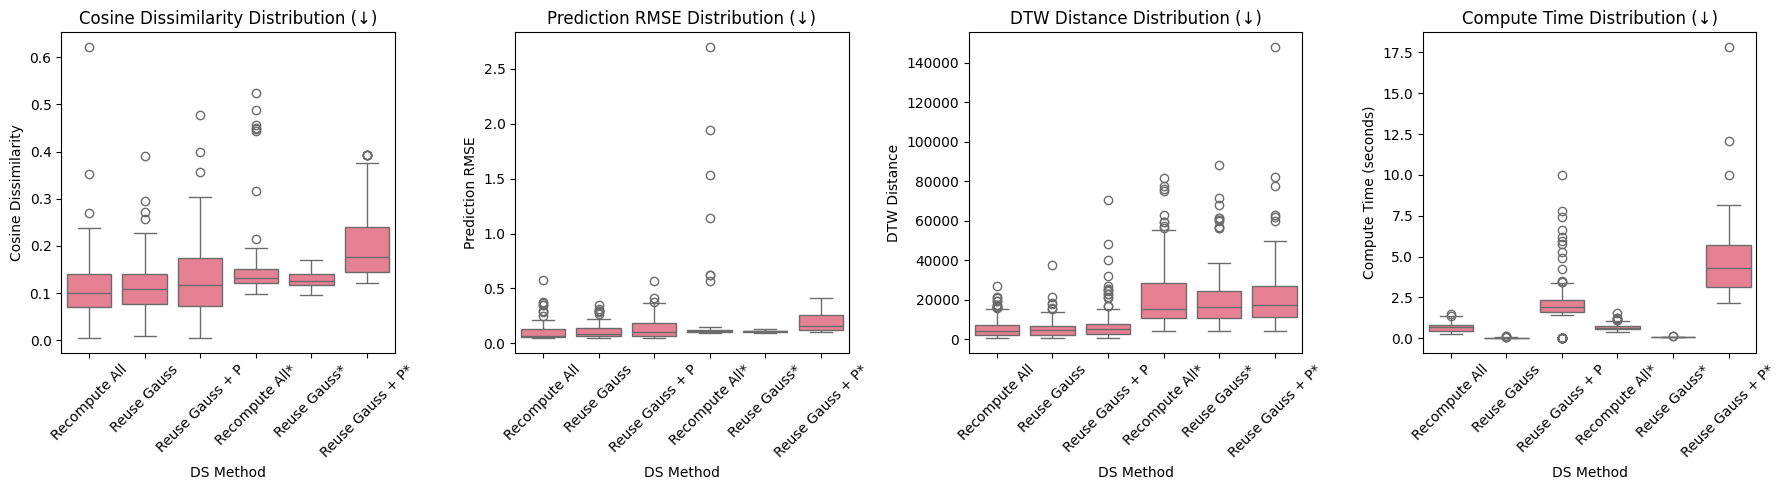

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
# fig.suptitle('Distribution Comparison Across DS Methods', fontsize=16, fontweight='bold')

# Cosine Dissimilarity box plot
sns.boxplot(data=df, x="ds_method", y="cosine_dissimilarity", ax=axes[0])
axes[0].set_title('Cosine Dissimilarity Distribution (↓)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('DS Method')
axes[0].set_ylabel('Cosine Dissimilarity')

# Prediction RMSE box plot
sns.boxplot(data=df, x="ds_method", y="prediction_rmse", ax=axes[1])
axes[1].set_title('Prediction RMSE Distribution (↓)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('DS Method')
axes[1].set_ylabel('Prediction RMSE')

# DTW Distance box plot
sns.boxplot(data=df, x="ds_method", y="dtw_distance_mean", ax=axes[2])
axes[2].set_title('DTW Distance Distribution (↓)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xlabel('DS Method')
axes[2].set_ylabel('DTW Distance')

# Compute Time box plot
if 'ds_compute_time' in df.columns:
    sns.boxplot(data=df, x="ds_method", y="ds_compute_time", ax=axes[3])
    axes[3].set_title('Compute Time Distribution (↓)')
    axes[3].tick_params(axis='x', rotation=45)
    axes[3].set_xlabel('DS Method')
    axes[3].set_ylabel('Compute Time (seconds)')

plt.tight_layout()
plt.savefig('figures/ds_method_comparison.png')
plt.show()